In [ ]:
# Data processing tools: pandas and numpy
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [ ]:
df_initial=pd.read_csv("/content/results_without_distortion.csv")

In [ ]:
df_initial.head()

,Random State,Dataset number,Is regression,Scoring,Model name 0,Model name 1,Model name 2,Best Parameters 0,Best Parameters 1,Best Parameters 2,Test score 0,Test score 1,Test score 2
0,0,0,True,neg_mean_absolute_percentage_error,DecisionTreeRegressor,RandomForestRegressor,ExtraTreesRegressor,{'decisiontreeregressor__max_depth': 7},"{'randomforestregressor__max_depth': 7, 'rando...","{'extratreesregressor__max_depth': 7, 'extratr...",0.037467,0.033104,0.035875
1,0,1,True,neg_mean_absolute_percentage_error,DecisionTreeRegressor,RandomForestRegressor,ExtraTreesRegressor,{'decisiontreeregressor__max_depth': 7},"{'randomforestregressor__max_depth': 7, 'rando...","{'extratreesregressor__max_depth': 7, 'extratr...",0.082797,0.052038,0.061364
2,0,2,True,neg_mean_absolute_percentage_error,DecisionTreeRegressor,RandomForestRegressor,ExtraTreesRegressor,{'decisiontreeregressor__max_depth': 7},"{'randomforestregressor__max_depth': 7, 'rando...","{'extratreesregressor__max_depth': 7, 'extratr...",0.034412,0.027716,0.046753
3,0,0,False,f1_micro,DecisionTreeClassifier,RandomForestClassifier,ExtraTreesClassifier,{'decisiontreeclassifier__max_depth': 7},"{'randomforestclassifier__max_depth': 7, 'rand...","{'extratreesclassifier__max_depth': 7, 'extrat...",0.533061,0.555918,0.510204
4,0,1,False,f1_micro,DecisionTreeClassifier,RandomForestClassifier,ExtraTreesClassifier,{'decisiontreeclassifier__max_depth': 7},"{'randomforestclassifier__max_depth': 7, 'rand...","{'extratreesclassifier__max_depth': 7, 'extrat...",0.994135,0.991935,0.910557


In [ ]:
df = pd.read_csv("/content/results_s_1_r_1_d_0_1.csv")

df_distorted_1 = df[df['Dataset number'] == 0]
df_distorted_2 = df[df['Dataset number'] == 1]
df_distorted_3 = pd.read_csv("/content/results_s_1_r_1_d_2.csv")

dfconcat = pd.concat([df_distorted_1,df_distorted_2,df_distorted_3], axis=0)

df_distorted_1.head()

,Random State,Dataset number,Is regression,Scoring,Noise mode,Noise level,Dropping mode,Imputation mode,Model name 0,Model name 1,Model name 2,Best Parameters 0,Best Parameters 1,Best Parameters 2,Test score 0,Test score 1,Test score 2
0,0,0,True,neg_mean_absolute_percentage_error,2,0.1,1,1,DecisionTreeRegressor,RandomForestRegressor,ExtraTreesRegressor,{'decisiontreeregressor__max_depth': 7},"{'randomforestregressor__max_depth': 7, 'rando...","{'extratreesregressor__max_depth': 7, 'extratr...",0.052071,0.046464,0.050397
1,0,0,True,neg_mean_absolute_percentage_error,2,0.1,1,2,DecisionTreeRegressor,RandomForestRegressor,ExtraTreesRegressor,{'decisiontreeregressor__max_depth': 7},"{'randomforestregressor__max_depth': 7, 'rando...","{'extratreesregressor__max_depth': 7, 'extratr...",0.050409,0.045026,0.047308
2,0,0,True,neg_mean_absolute_percentage_error,2,0.1,1,3,DecisionTreeRegressor,RandomForestRegressor,ExtraTreesRegressor,{'decisiontreeregressor__max_depth': 7},"{'randomforestregressor__max_depth': 7, 'rando...","{'extratreesregressor__max_depth': 7, 'extratr...",0.049996,0.045271,0.047278
3,0,0,True,neg_mean_absolute_percentage_error,2,0.1,1,4,DecisionTreeRegressor,RandomForestRegressor,ExtraTreesRegressor,{'decisiontreeregressor__max_depth': 7},"{'randomforestregressor__max_depth': 7, 'rando...","{'extratreesregressor__max_depth': 7, 'extratr...",0.048746,0.043618,0.045947
4,0,0,True,neg_mean_absolute_percentage_error,2,0.1,1,5,DecisionTreeRegressor,RandomForestRegressor,ExtraTreesRegressor,{'decisiontreeregressor__max_depth': 7},"{'randomforestregressor__max_depth': 7, 'rando...","{'extratreesregressor__max_depth': 7, 'extratr...",0.050987,0.044633,0.046867


In [ ]:
a = df['Noise mode'].value_counts()

In [ ]:
a

2    273
1    270
Name: Noise mode, dtype: int64

In [ ]:
df['Noise level'].value_counts()

 0.1     93
 0.2     90
 0.3     90
-6.0     90
 0.0     90
 10.0    90
Name: Noise level, dtype: int64

In [ ]:
df['Random State'].value_counts()

0    543
Name: Random State, dtype: int64

In [ ]:
df['Dropping mode'].value_counts()

1    183
2    180
3    180
Name: Dropping mode, dtype: int64

In [ ]:
type(df['Imputation mode'].value_counts())

pandas.core.series.Series

**DROPPING MODE**

In [ ]:
#Aggregated - for all datasets. Dropping probability is expected to be added
agg_func_drop = {
    'Test score 0': ['median'],
    'Test score 1': ['median'],
    'Test score 2': ['median'],
}
df_drop = dfconcat.groupby(['Dataset number', 'Dropping mode']).agg(agg_func_drop).round(2)
df_drop.columns = ['_'.join(col).rstrip('_') for col in df_drop.columns.values]
df_drop

Test score 0_median  Test score 1_median  \
Dataset number Dropping mode                                             
0              1                             0.07                 0.07   
               2                             0.07                 0.06   
               3                             0.07                 0.07   
1              1                             0.16                 0.16   
               2                             0.16                 0.16   
               3                             0.17                 0.16   
2              1                             0.27                 0.26   
               2                             0.26                 0.25   
               3                             0.26                 0.25   

                              Test score 2_median  
Dataset number Dropping mode                       
0              1                             0.07  
               2                             0.06  
               3                             0.07  
1              1                             0.15  
               2                             0.15  
               3                             0.16  
2              1                             0.27  
               2                             0.27  
               3                             0.27

In [ ]:
#for one dataset. Dropping probability is expected to be added
agg_func_drop = {
    'Test score 0': ['median'],
    'Test score 1': ['median'],
    'Test score 2': ['median'],
}
df_drop = df_distorted_1.groupby(['Dropping mode']).agg(agg_func_drop).round(2)
df_drop.columns = ['_'.join(col).rstrip('_') for col in df_drop.columns.values]
df_drop

,Test score 0_median,Test score 1_median,Test score 2_median
Dropping mode,,,
1,0.07,0.07,0.07
2,0.07,0.06,0.06
3,0.07,0.07,0.07


**Function**

In [ ]:
def by_dropping(df):
    agg_func_noise = {
    'Test score 0': ['median'],
    'Test score 1': ['median'],
    'Test score 2': ['median'],
    }
    df_noise = df.groupby(['Dropping mode'], as_index = False).agg(agg_func_noise).round(2)
    df_noise.columns = ['_'.join(col).rstrip('_') for col in df_noise.columns.values]
    return df_noise.groupby(['Dropping mode']).get_group(1), df_noise.groupby(['Dropping mode']).get_group(2), df_noise.groupby(['Dropping mode']).get_group(3)

In [ ]:
#Median for every probability

def drop_proba_median(df):
    medians = []
    for mdnum in range(3):
      # by_dropping output is List with length = 3
        for n in [0, 1, 2]:
            medians.append(by_dropping(df)[n]['Test score '+str(mdnum)+'_median'].median())
    return medians

In [ ]:
def dropping_by_models(df):
    return [[drop_proba_median(df)[0], drop_proba_median(df)[1], drop_proba_median(df)[2]], #model 1
            [drop_proba_median(df)[3], drop_proba_median(df)[4], drop_proba_median(df)[5]], #model 2
            [drop_proba_median(df)[6], drop_proba_median(df)[7], drop_proba_median(df)[8]]] #model 3

In [ ]:
#Dropping in 3 Models
d1_dp = dropping_by_models(df_distorted_1)
d2_dp = dropping_by_models(df_distorted_2)
d3_dp = dropping_by_models(df_distorted_3)

In [ ]:
print(d1_dp)
print(d2_dp)
print(d3_dp)

[[0.07, 0.07, 0.07], [0.07, 0.06, 0.07], [0.07, 0.06, 0.07]]
[[0.16, 0.16, 0.17], [0.16, 0.16, 0.16], [0.15, 0.15, 0.16]]
[[0.27, 0.26, 0.26], [0.26, 0.25, 0.25], [0.27, 0.27, 0.27]]


In [ ]:
#Scores for diagrams. Every model score - for different diagrams
#1 model
rdr_1_dp1 = (d1_dp[0][0] + d2_dp[0][0] + d3_dp[0][0])
rdr_1_dp2 = (d1_dp[0][1] + d2_dp[0][1] + d3_dp[0][1])
rdr_1_dp3 = (d1_dp[0][2] + d2_dp[0][2] + d3_dp[0][2])

#2 model
rdr_2_dp1 = (d1_dp[1][0] + d2_dp[1][0] + d3_dp[1][0])
rdr_2_dp2 = (d1_dp[1][1] + d2_dp[1][1] + d3_dp[1][1])
rdr_2_dp3 = (d1_dp[1][2] + d2_dp[1][2] + d3_dp[1][2])

#3 model
rdr_3_dp1 = (d1_dp[2][0] + d2_dp[2][0] + d3_dp[2][0])
rdr_3_dp2 = (d1_dp[2][1] + d2_dp[2][1] + d3_dp[2][1])
rdr_3_dp3 = (d1_dp[2][2] + d2_dp[2][2] + d3_dp[2][2])

**IMPUTATION MODE**

In [ ]:
#Aggregated - for all datasets
agg_func_imp = {
    'Test score 0': ['median'],
    'Test score 1': ['median'],
    'Test score 2': ['median'],
}
df_imp = dfconcat.groupby(['Dataset number', 'Imputation mode'], as_index = False).agg(agg_func_imp).round(2)
df_imp.columns = ['_'.join(col).rstrip('_') for col in df_imp.columns.values]
df_imp

,Dataset number,Imputation mode,Test score 0_median,Test score 1_median,Test score 2_median
0,0,1,0.07,0.07,0.07
1,0,2,0.07,0.07,0.07
2,0,3,0.07,0.07,0.07
3,0,4,0.07,0.07,0.07
4,0,5,0.07,0.07,0.07
5,1,1,0.16,0.16,0.15
6,1,2,0.16,0.16,0.15
7,1,3,0.16,0.16,0.15
8,1,4,0.16,0.16,0.15
9,1,5,0.17,0.16,0.15


In [ ]:
#Scores for diagrams. Every model score - for different diagrams
#1 model
rdr_1_im1 = df_imp['Test score 0_median'][0] + df_imp['Test score 0_median'][5] + df_imp['Test score 0_median'][10]
rdr_1_im2 = df_imp['Test score 0_median'][1] + df_imp['Test score 0_median'][6] + df_imp['Test score 0_median'][11]
rdr_1_im3 = df_imp['Test score 0_median'][2] + df_imp['Test score 0_median'][7] + df_imp['Test score 0_median'][12]
rdr_1_im4 = df_imp['Test score 0_median'][3] + df_imp['Test score 0_median'][8] + df_imp['Test score 0_median'][13]
rdr_1_im5 = df_imp['Test score 0_median'][4] + df_imp['Test score 0_median'][9] + df_imp['Test score 0_median'][14]

#2 model
rdr_2_im1 = df_imp['Test score 1_median'][0] + df_imp['Test score 1_median'][5] + df_imp['Test score 1_median'][10]
rdr_2_im2 = df_imp['Test score 1_median'][1] + df_imp['Test score 1_median'][6] + df_imp['Test score 1_median'][11]
rdr_2_im3 = df_imp['Test score 1_median'][2] + df_imp['Test score 1_median'][7] + df_imp['Test score 1_median'][12]
rdr_2_im4 = df_imp['Test score 1_median'][3] + df_imp['Test score 1_median'][8] + df_imp['Test score 1_median'][13]
rdr_2_im5 = df_imp['Test score 1_median'][4] + df_imp['Test score 1_median'][9] + df_imp['Test score 1_median'][14]

#3 model
rdr_3_im1 = df_imp['Test score 2_median'][0] + df_imp['Test score 2_median'][5] + df_imp['Test score 2_median'][10]
rdr_3_im2 = df_imp['Test score 2_median'][1] + df_imp['Test score 2_median'][6] + df_imp['Test score 2_median'][11]
rdr_3_im3 = df_imp['Test score 2_median'][2] + df_imp['Test score 2_median'][7] + df_imp['Test score 2_median'][12]
rdr_3_im4 = df_imp['Test score 2_median'][3] + df_imp['Test score 2_median'][8] + df_imp['Test score 2_median'][13]
rdr_3_im5 = df_imp['Test score 2_median'][4] + df_imp['Test score 2_median'][9] + df_imp['Test score 2_median'][14]

In [ ]:
# def by_imputation(df):
#     agg_func_noise = {
#     'Test score 0': ['median'],
#     'Test score 1': ['median'],
#     'Test score 2': ['median'],
#     }
#     df_noise = df.groupby(['Imputation mode'], as_index = False).agg(agg_func_noise).round(2)
#     df_noise.columns = ['_'.join(col).rstrip('_') for col in df_noise.columns.values]
#     return df_noise.groupby(['Imputation mode']).get_group(1), df_noise.groupby(['Imputation mode']).get_group(2), df_noise.groupby(['Imputation mode']).get_group(3), df_noise.groupby(['Imputation mode']).get_group(4), df_noise.groupby(['Imputation mode']).get_group(5)

**NOISE MODE**

In [ ]:
#Aggregated - for all datasets
agg_func_noise = {
    'Test score 0': ['median'],
    'Test score 1': ['median'],
    'Test score 2': ['median'],
}
df_noise = dfconcat.groupby(['Dataset number', 'Noise mode', 'Noise level']).agg(agg_func_noise).round(2)
df_noise.columns = ['_'.join(col).rstrip('_') for col in df_noise.columns.values]
df_noise

Test score 0_median  \
Dataset number Noise mode Noise level                        
0              1          -6.0                        0.09   
                           0.0                        0.08   
                           10.0                       0.07   
               2           0.1                        0.05   
                           0.2                        0.06   
                           0.3                        0.06   
1              1          -6.0                        0.18   
                           0.0                        0.17   
                           10.0                       0.16   
               2           0.1                        0.14   
                           0.2                        0.15   
                           0.3                        0.16   
2              1          -6.0                        0.39   
                           0.0                        0.37   
                           10.0                       0.28   
               2           0.1                        0.13   
                           0.2                        0.19   
                           0.3                        0.25   

                                       Test score 1_median  \
Dataset number Noise mode Noise level                        
0              1          -6.0                        0.08   
                           0.0                        0.08   
                           10.0                       0.07   
               2           0.1                        0.05   
                           0.2                        0.05   
                           0.3                        0.06   
1              1          -6.0                        0.17   
                           0.0                        0.17   
                           10.0                       0.16   
               2           0.1                        0.11   
                           0.2                        0.14   
                           0.3                        0.15   
2              1          -6.0                        0.39   
                           0.0                        0.37   
                           10.0                       0.27   
               2           0.1                        0.12   
                           0.2                        0.17   
                           0.3                        0.24   

                                       Test score 2_median  
Dataset number Noise mode Noise level                       
0              1          -6.0                        0.09  
                           0.0                        0.08  
                           10.0                       0.07  
               2           0.1                        0.05  
                           0.2                        0.05  
                           0.3                        0.06  
1              1          -6.0                        0.17  
                           0.0                        0.17  
                           10.0                       0.16  
               2           0.1                        0.12  
                           0.2                        0.14  
                           0.3                        0.15  
2              1          -6.0                        0.39  
                           0.0                        0.37  
                           10.0                       0.28  
               2           0.1                        0.14  
                           0.2                        0.20  
                           0.3                        0.26

In [ ]:
#for one dataset
agg_func_noise = {
    'Test score 0': ['median'],
    'Test score 1': ['median'],
    'Test score 2': ['median'],
}
df_noise = df_distorted_1.groupby(['Noise mode', 'Noise level']).agg(agg_func_noise).round(2)
df_noise.columns = ['_'.join(col).rstrip('_') for col in df_noise.columns.values]
df_noise

Test score 0_median  Test score 1_median  \
Noise mode Noise level                                             
1          -6.0                        0.09                 0.08   
            0.0                        0.08                 0.08   
            10.0                       0.07                 0.07   
2           0.1                        0.05                 0.05   
            0.2                        0.06                 0.05   
            0.3                        0.06                 0.06   

                        Test score 2_median  
Noise mode Noise level                       
1          -6.0                        0.09  
            0.0                        0.08  
            10.0                       0.07  
2           0.1                        0.05  
            0.2                        0.05  
            0.3                        0.06

**Function**

In [ ]:
def by_noise(df):
    agg_func_noise = {
    'Test score 0': ['median'],
    'Test score 1': ['median'],
    'Test score 2': ['median'],
    }
    df_noise = df.groupby(['Noise mode', 'Noise level'], as_index = False).agg(agg_func_noise).round(2)
    df_noise.columns = ['_'.join(col).rstrip('_') for col in df_noise.columns.values]
    return df_noise.groupby(['Noise mode']).get_group(1), df_noise.groupby(['Noise mode']).get_group(2)

In [ ]:
for mdnum in range(3):
    for n in [0, 1]:    
        lol = by_noise(df_distorted_1)[n]['Test score '+str(mdnum)+'_median'].median()
        print(lol)

0.08
0.06
0.08
0.05
0.08
0.05


In [ ]:
def noise_level_median(df):
    medians = []
    # by_noise output is List
    for mdnum in range(3):
        for n in [0, 1]:
            medians.append(by_noise(df)[n]['Test score '+str(mdnum)+'_median'].median())
    return medians

In [ ]:
noise_level_median(df_distorted_1)
noise_level_median(df_distorted_2)
noise_level_median(df_distorted_3)

[0.37, 0.19, 0.37, 0.17, 0.37, 0.2]

In [ ]:
def noise_by_models(df):
    return [[noise_level_median(df)[0], noise_level_median(df)[1]], #model 1
            [noise_level_median(df)[2], noise_level_median(df)[3]], #model 2
            [noise_level_median(df)[4], noise_level_median(df)[5]]] #model 3

In [ ]:
#Noise modes in 3 Models
d1_nm = noise_by_models(df_distorted_1)
d2_nm = noise_by_models(df_distorted_2)
d3_nm = noise_by_models(df_distorted_3)

In [ ]:
print(d1_nm)
print(d2_nm)
print(d3_nm)

[[0.08, 0.06], [0.08, 0.05], [0.08, 0.05]]
[[0.17, 0.15], [0.17, 0.14], [0.17, 0.14]]
[[0.37, 0.19], [0.37, 0.17], [0.37, 0.2]]


In [ ]:
#Scores for diagrams. Every model score - for different diagrams
#1 model
rdr_1_nm1 = (d1_nm[0][0] + d2_nm[0][0] + d3_nm[0][0])
rdr_1_nm2 = (d1_nm[0][1] + d2_nm[0][1] + d3_nm[0][1])

#2 model
rdr_2_nm1 = (d1_nm[1][0] + d2_nm[1][0] + d3_nm[1][0])
rdr_2_nm2 = (d1_nm[1][1] + d2_nm[1][1] + d3_nm[1][1])

#3 model
rdr_3_nm1 = (d1_nm[2][0] + d2_nm[2][0] + d3_nm[2][0])
rdr_3_nm2 = (d1_nm[2][1] + d2_nm[2][1] + d3_nm[2][1])

In [ ]:
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    
    class RadarTransform(PolarAxes.PolarTransform):
        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

No handles with labels found to put in legend.


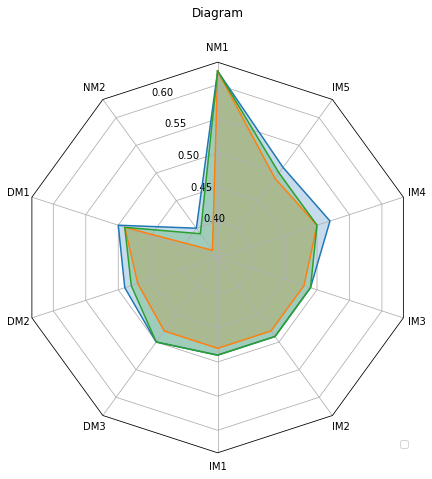

In [ ]:
data = [['NM1', 'NM2', 'DM1', 'DM2', 'DM3', 'IM1', 'IM2', 'IM3', 'IM4', 'IM5'],
        ('Diagram', [
            [rdr_1_nm1, rdr_1_nm2, rdr_1_dp1, rdr_1_dp2, rdr_1_dp3, rdr_1_im1, rdr_1_im2, rdr_1_im3, rdr_1_im4, rdr_1_im5],
            [rdr_2_nm1, rdr_2_nm2, rdr_2_dp1, rdr_2_dp2, rdr_2_dp3, rdr_2_im1, rdr_2_im2, rdr_2_im3, rdr_2_im4, rdr_2_im5],
            [rdr_3_nm1, rdr_3_nm2, rdr_3_dp1, rdr_3_dp2, rdr_3_dp3, rdr_3_im1, rdr_3_im2, rdr_3_im3, rdr_3_im4, rdr_3_im5],
            ])]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([0.4, 0.45, 0.5, 0.55, 0.6, 0.65])
ax.set_title(title,  position=(0.5, 1.1), ha='center')
ax.legend(loc = 'lower right')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d, alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.show()